In [ ]:
# We load the data

import numpy as np

In [4]:
X = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')

In [5]:
# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [6]:
# We plot the data

import matplotlib.pyplot as plt

In [7]:
##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

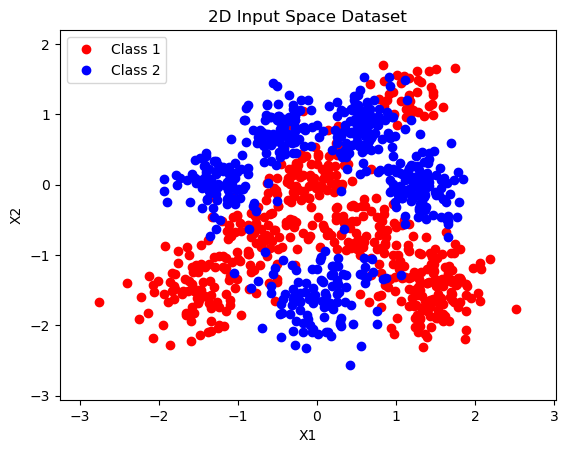

In [16]:
##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y, title):
    xx, yy = plot_data_internal(X, y)
    plt.title(title)
    plt.show()

plot_data(X, y, title='2D Input Space Dataset')

In [9]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [17]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))


In [18]:
##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))


In [19]:
##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#
def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


In [20]:
##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#
def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)


In [23]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        gradient = X_tilde_train.T @ (y_train - sigmoid_value)

        w = w + alpha * gradient

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [24]:
# We train the classifier

alpha = 0.01
n_steps = 1000

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.6947859868979721 -0.6819364082815634
-0.6541102914630786 -0.6967495584623454
-0.6418796696314157 -0.6448802179739639
-0.632919300881501 -0.6609489126653467
-0.6310059386536083 -0.6410764977795321
-0.6284004501121063 -0.6482857272080429
-0.6301950463102544 -0.6472014191789957
-0.6311397664647768 -0.6437228524049148
-0.6389018933963858 -0.6655057843537034
-0.6432635888760697 -0.6484736578105887
-0.6645868739120004 -0.7058889214400204
-0.6642513933275296 -0.6633858681362921
-0.7049184119834664 -0.7634366463465472
-0.6780918425538701 -0.6743769128382421
-0.7278030161578013 -0.7952045860077257
-0.6798880716705458 -0.6757047652545322
-0.7291477964695935 -0.7972521864146276
-0.6798208790700826 -0.675630836650479
-0.7289076393667929 -0.7969664532545306
-0.6798107709579102 -0.6756218352872496
-0.7289107796140176 -0.7969768684937271
-0.6798111667689167 -0.6756218001714633
-0.7289114131614408 -0.7969790604261335
-0.6798110615399742 -0.6756216389027375
-0.7289111927633861 -0.79697902273334
-0.6

In [25]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

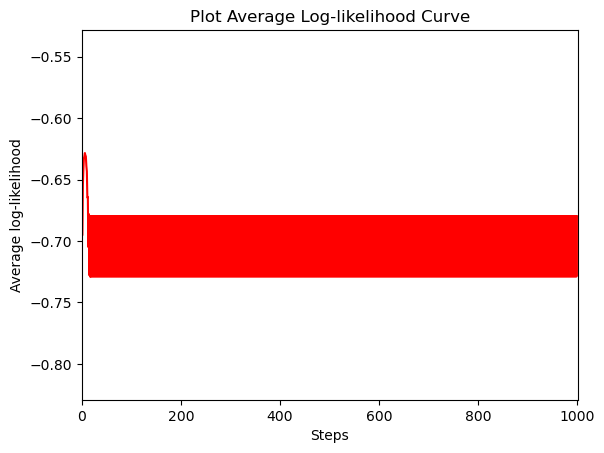

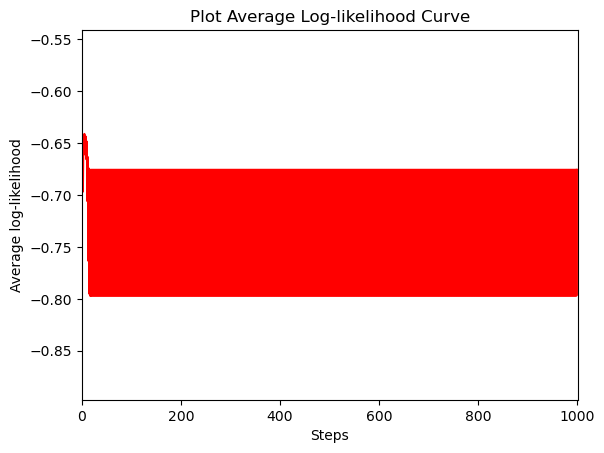

In [26]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

In [27]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

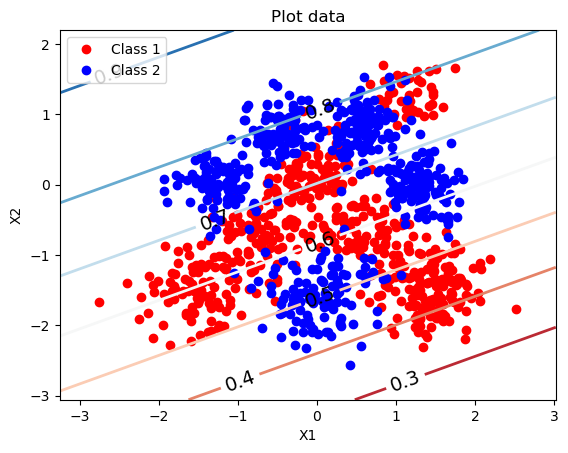

In [28]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

In [29]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [30]:
# We expand the data

l = 0.01

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [41]:
# We train the new classifier on the feature expanded inputs

alpha = 0.01
n_steps = 5000

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.8189937081728226 -0.7244541741672496
-0.7978562404355836 -0.7122786775318304
-0.7874335344501889 -0.697525599862001
-0.7809973210174269 -0.697647029669982
-0.776387537158779 -0.6930018087578557
-0.772584152083983 -0.6939889029163274
-0.7691688769489421 -0.6922127706540394
-0.7659397625336238 -0.6928272111904942
-0.7628069442740869 -0.6920392619598669
-0.7597273564773136 -0.6923227739788922
-0.7566811487169377 -0.69192313336229
-0.753658828579199 -0.6920180275247785
-0.7506559151628687 -0.6917848803339203
-0.7476702383063326 -0.6917839170011049
-0.7447007332860599 -0.6916261194992649
-0.7417468548628057 -0.6915785750572914
-0.7388083052097326 -0.6914561067846489
-0.7358849043720079 -0.691386480085063
-0.7329765284373534 -0.6912810779101849
-0.7300830805565856 -0.6912012511129356
-0.7272044767513398 -0.691104393798656
-0.7243406393872255 -0.6910200793361386
-0.7214914938791764 -0.6909277366418121
-0.718656967220759 -0.6908416746603404
-0.7158369872130791 -0.6907519222137916
-0.7130314

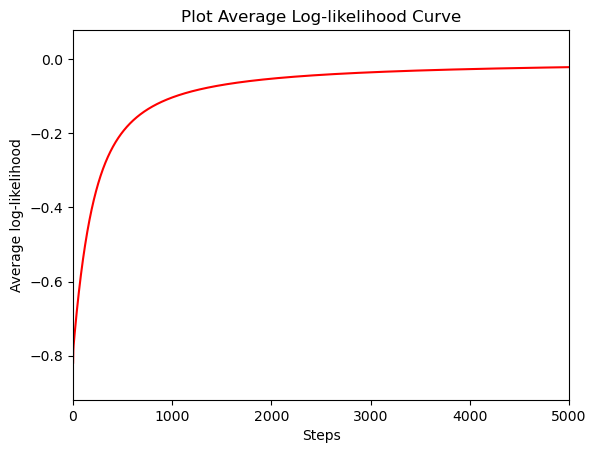

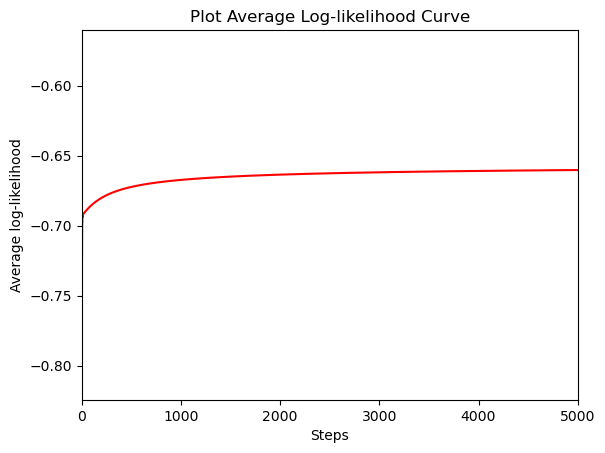

In [42]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

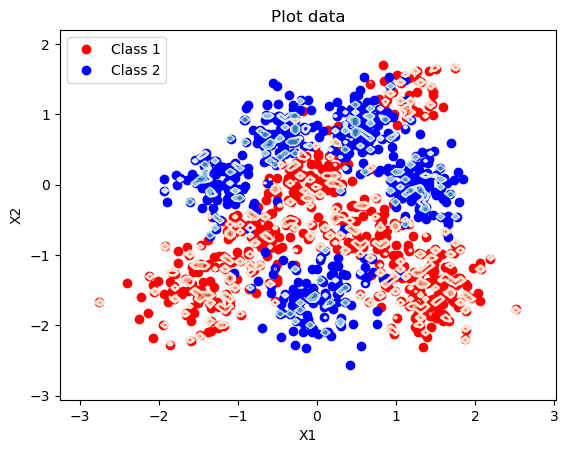

In [43]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))